In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.style.use('default')

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Удаляем ненужный столбец
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


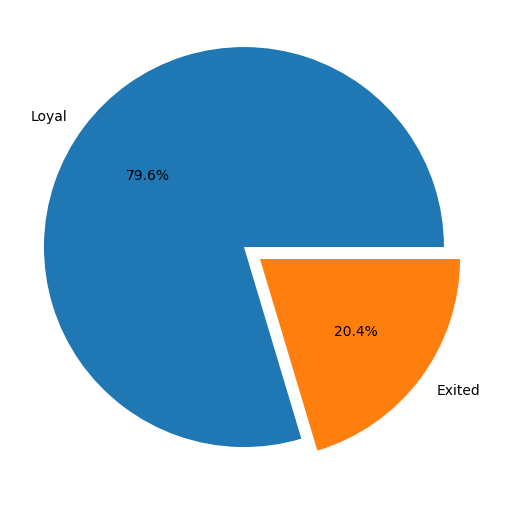

In [3]:
loyal_count = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_count,
    labels=['Loyal', 'Exited'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

Задание 9.1

Для сравнения соотношения ушедших и лояльных клиентов банка была использована круговая диаграмма. 
С ее помощью можно ясно увидеть, что в разрезе имеющихся данных пятая часть клиентов перестала пользваться услугами банка, а остальные все еще явлюятся клиентами. 

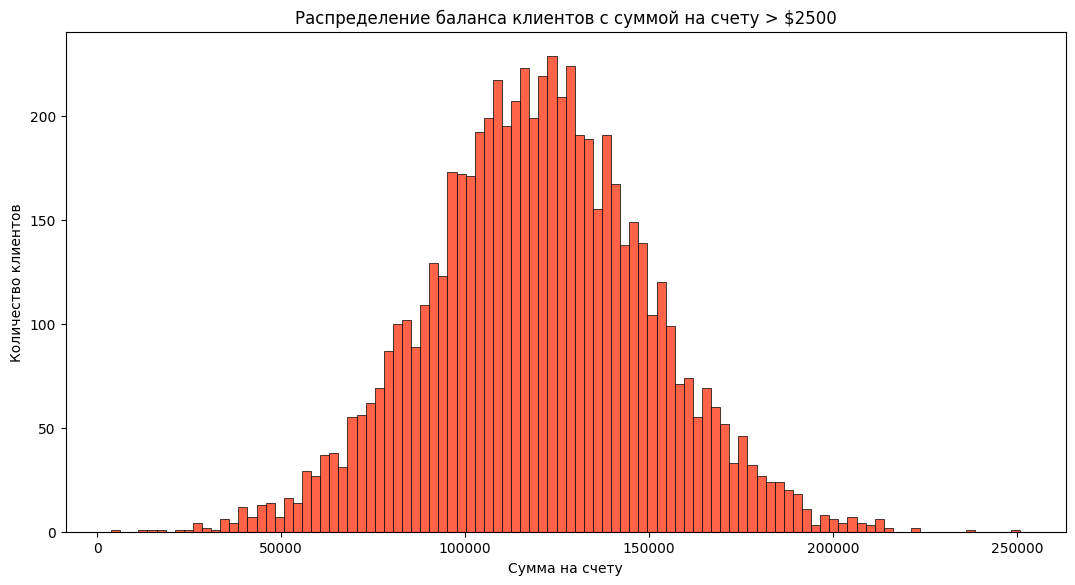

In [4]:
balance2500 = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(
    x=balance2500["Balance"],
    label=["Баланс клиентов"],
    color="tomato",
    bins=100,
    linewidth=0.5,
    edgecolor="black"
)
axes.set_title("Распределение баланса клиентов с суммой на счету > $2500")
axes.set_xlabel("Сумма на счету")
axes.set_ylabel("Количество клиентов");

Задание 9.2

Распредение клиентов банка относительно сумм на их счетах. 
Тут мы можем видеть, что распределение ялвяется нормальным с пиком в районе $125.000, т.е. у большинства клиентов на счету сумма близкая к этому числу и чем дальше мы от него удаляемся, тем меньше клиентов имеющих подобные суммы

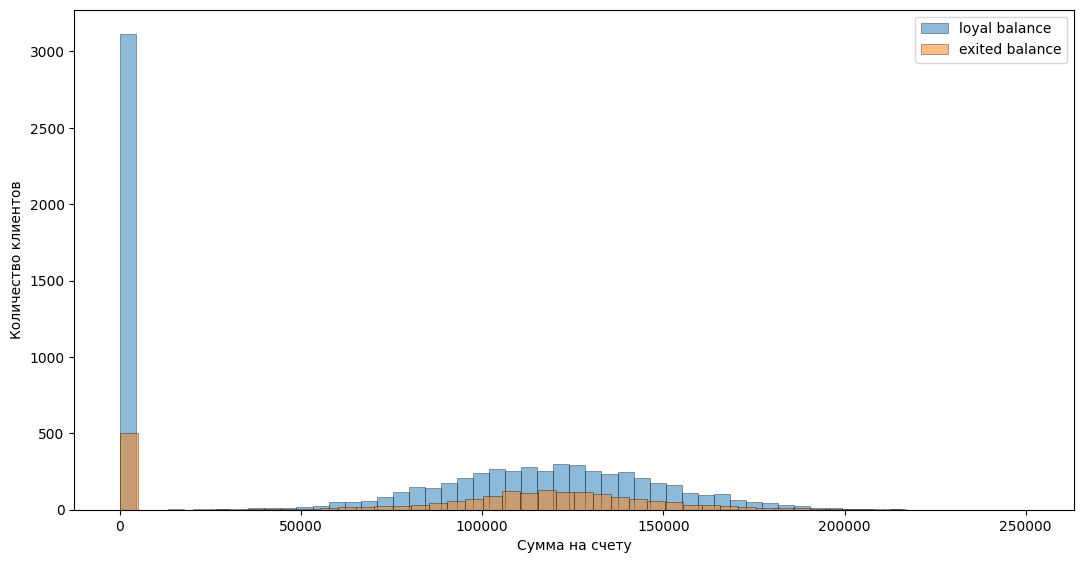

In [5]:
# loyal_balance = churn_data[(churn_data['Exited']==0) & (churn_data['Balance'] > 2500)]['Balance']
# exited_balance = churn_data[(churn_data['Exited']==1) & (churn_data['Balance'] > 2500)]['Balance']

loyal_balance = churn_data[(churn_data['Exited']==0)]['Balance']
exited_balance = churn_data[(churn_data['Exited']==1)]['Balance']

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

plt.hist(loyal_balance, bins=50, alpha=0.5, label='loyal balance', linewidth=0.5, edgecolor="black")
plt.hist(exited_balance, bins=50, alpha=0.5, label='exited balance', linewidth=0.5, edgecolor="black")
plt.legend(loc='upper right')
axes.set_xlabel("Сумма на счету")
axes.set_ylabel("Количество клиентов");
plt.show()

Задание 9.3

Сравнение сумм на счету ушедших и оставшихся клиентов. 
Судя по полученному графику, распределение средств в обеих категориях похожи. 

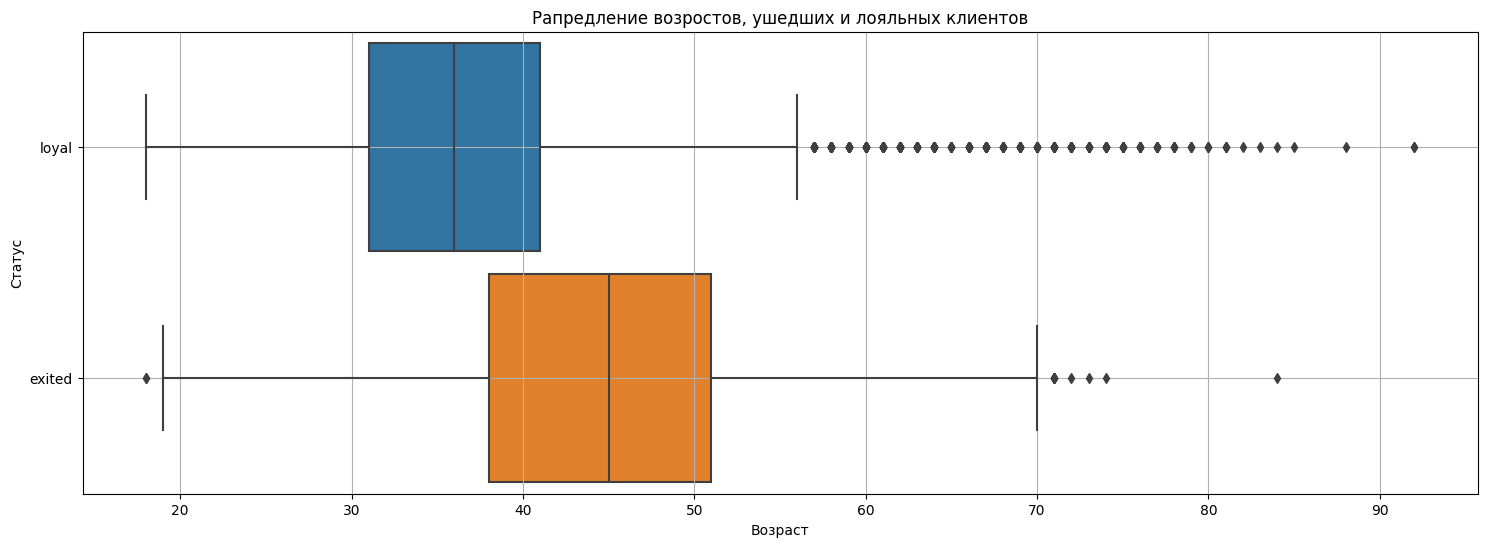

In [6]:
fig = plt.figure(figsize=(18, 6))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Рапредление возростов, ушедших и лояльных клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус');
boxplot.set_yticklabels(['loyal', 'exited'])
boxplot.grid()

Задание 9.4

Ящики с усами для анализа возраста ушедших и лояльных клиентов. 
Больше выбросов мы видим в группе лояльных клиентов. 
Ясно видно, что разница медианных возростов двух категорий клиентов, состовляет около 10 лет. При этом ушедшие клиенты представляют из себя более возростную группу. Таким образом банку стоит обратить внимание на клиентов постарше и узнать какие их потрбености не удоволетворяются.

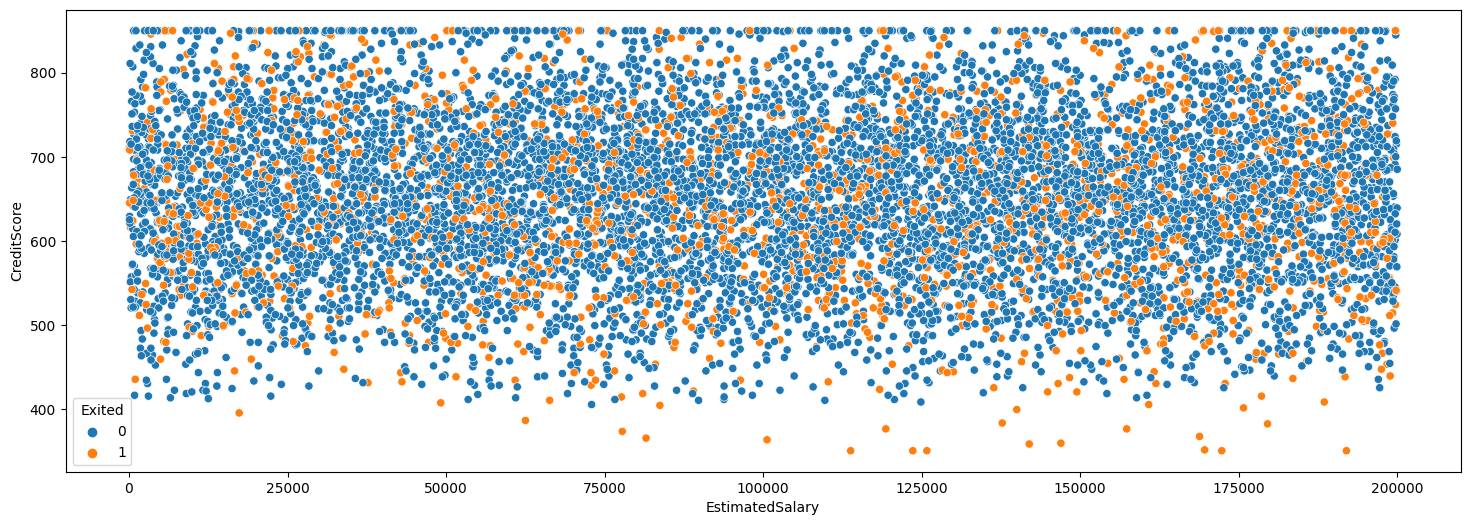

In [7]:
fig = plt.figure(figsize=(18, 6))
sns.scatterplot(
    data=churn_data,
    x="EstimatedSalary",
    y="CreditScore",
    hue="Exited");

Задание 9.5

Зависимость между Ожидаемо зарплатой и кредитным рейтингов плюс цветом обозначено ушел клиент или нет. 
Что точно видно, так это то что крдеитный рейтинг ниже 400 имеет очень мало людей и все они уже не клиенты банка. Так же очень мало клиентов в дипазоне 800-900, кажется что есть тяготение к верхней границе. 
В целом же данное распределение не показывает прямой заисимости между рассматриваемыми признаками. 

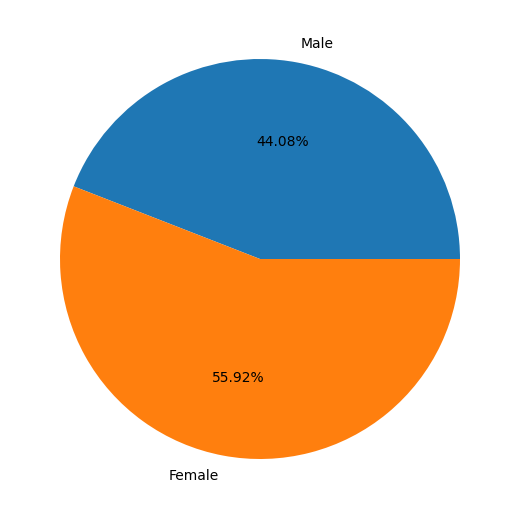

In [8]:
all_exit = churn_data[(churn_data['Exited']==1)]['Exited'].count()
male_exit = churn_data[(churn_data['Exited']==1) & (churn_data['Gender'] == 'Male')]['Exited'].count()
female_exit = churn_data[(churn_data['Exited']==1) & (churn_data['Gender'] == 'Female')]['Exited'].count()

m = round(male_exit/all_exit*100, 2)
f = round(female_exit/all_exit*100, 2)

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [m,f],
    labels=['Male', 'Female'],
    autopct='%.2f%%',
);

Задание 9.6

Приняв множество ушедших из банка людей за 100% мы можем посмотреть каково соотношение и женщин в этой группе. 

Около 56% ушедших это женщины и окло 44 мужчины, т.е. женщины уходят из этого банка чуть чаще.  

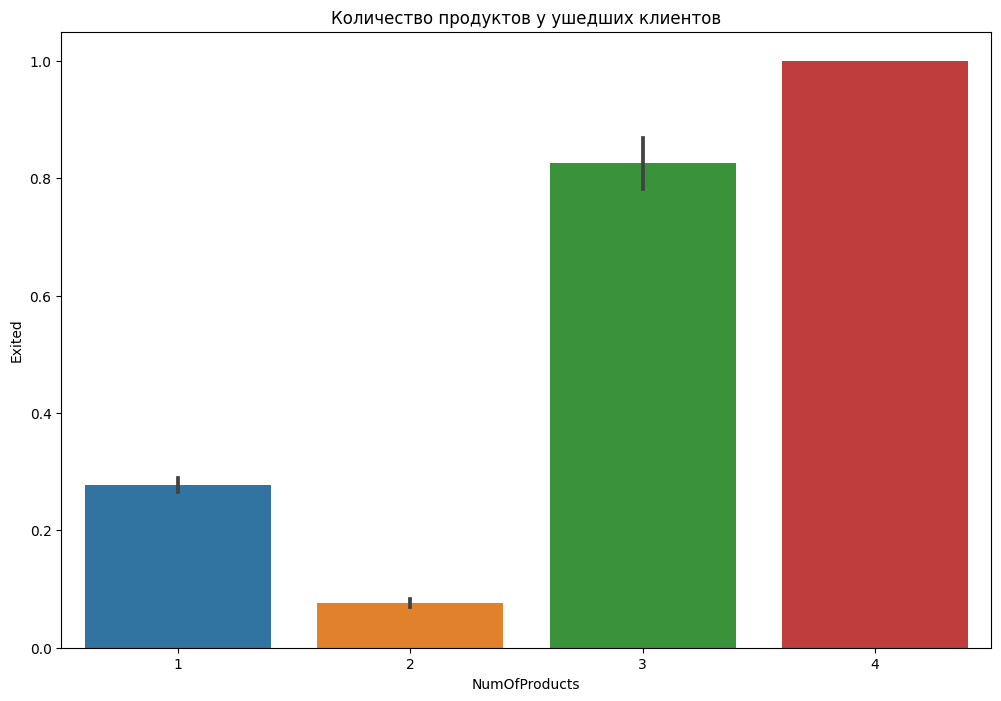

In [9]:
fig = plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
)
barplot.set_title('Количество продуктов у ушедших клиентов');


Задание 9.7

Как видно из диаграмы меньше всего уходит клиентов, у которых 2 услуги, а больше всего тех у кого по 3 или 4 услуги.

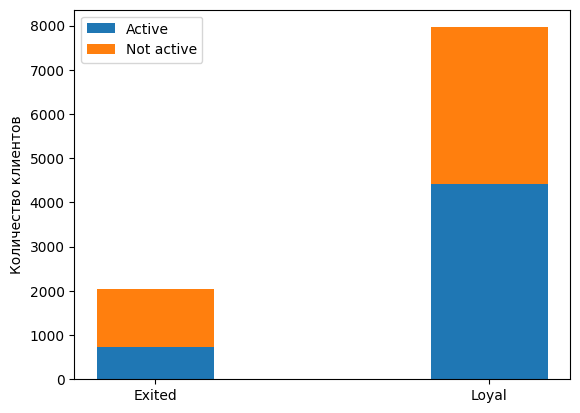

In [10]:
ext_a = churn_data[(churn_data['Exited']==1) & (churn_data['IsActiveMember'] == 1)].shape[0]
ext_na = churn_data[(churn_data['Exited']==1) & (churn_data['IsActiveMember'] == 0)].shape[0]
loyal_a = churn_data[(churn_data['Exited']==0) & (churn_data['IsActiveMember'] == 1)].shape[0]
loyal_na = churn_data[(churn_data['Exited']==0) & (churn_data['IsActiveMember'] == 0)].shape[0]

# print(ext_a, ext_na, loyal_a, loyal_na, sep='\n\n')

labels = ['Exited', 'Loyal']
# exited = [ext_a, ext_na]
# loyal = [loyal_a, loyal_na]
active = [ext_a, loyal_a]
not_active = [ext_na, loyal_na]
width = 0.35      

fig, ax = plt.subplots()

ax.bar(labels, active, width, label='Active')
ax.bar(labels, not_active, width, bottom=active,
       label='Not active')

ax.set_ylabel('Количество клиентов')
ax.legend()

plt.show()

Задание 9.8

По получившемся графикам видно, что больше половины оставшихся клиентов, являются в то же время активными. Что касается ушедших клиентов, там противоположная ситуация большая часть из них наоборот не была активна. 

Можно посоветовать банку поработать над тем, чтобы текущие и новые клиенты были активны, разобраться почему клиенты могут переходить из статуас активного в неактивный и что может поомчь им сохранять свою активность возможно какие-то новые продукты или предложения. 

In [11]:
countrys = churn_data.groupby("Geography").size().to_frame().reset_index()
countrys.set_axis(['Geo', 'Size'], axis='columns', inplace=True)

fig = px.choropleth(
    data_frame=countrys, #DataFrame
    locations="Geo", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Size", #от чего зависит цвет
    range_color=[0, 6e3], #диапазон цвета
    title='Распределние ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Viridis' #палитра цветов
)

fig.show()


Задание 9.9

Как видно по карте, ушедшие клиеты банка есть в 3х странах - Франция, германия и Испания. 
Больше всего ушедших клиентов наблюдается во Франции. Причем в 2 раза больше, чем в соседних странах. 

In [12]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

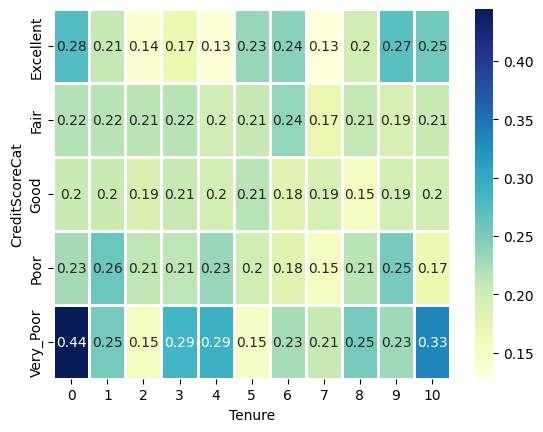

In [13]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', linewidths=.8, annot=True)

Задание 9.10

По тепловой карте видно, что чаще всего уходят клиенты с самым низким кредитным рейтингом, особенно те кто пробыл клиентом меньше года. 
Также часто уходили клиенты с кредитным рейтингом "Excellent". Причем это происходило как на первом году так и на 5, 6, 9 и 10